# Online Shopper's Intention - kamień milowy 2
Bartosz Siński, Michał Piasecki

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
np.seed =  42

In [22]:
df_shoppers = pd.read_csv("online_shoppers_intention.csv")

In [23]:
df_shoppers.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Pre-processing danych

In [24]:
df_shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [25]:
df_shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df_shoppers.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [26]:
numeric = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]
categorical = ["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend","Revenue"]

In [27]:
df_shoppers[categorical].nunique()

Month               10
OperatingSystems     8
Browser             13
Region               9
TrafficType         20
VisitorType          3
Weekend              2
Revenue              2
dtype: int64

W naszym zbiorze danych nie ma wartości brakujących oraz widzimy, że wszystkie zmienne kategoryczne mają niewielką liczba kategorii więc będziemy chcieli je zostawić.  

In [28]:
c = df_shoppers[numeric].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so = so.loc[(so < 1) & (so > 0.5)]
type(so)
so[::-1]

ExitRates                BounceRates                0.913004
BounceRates              ExitRates                  0.913004
ProductRelated           ProductRelated_Duration    0.860927
ProductRelated_Duration  ProductRelated             0.860927
Informational            Informational_Duration     0.618955
Informational_Duration   Informational              0.618955
Administrative_Duration  Administrative             0.601583
Administrative           Administrative_Duration    0.601583
dtype: float64

In [29]:
cols = numeric.copy()
cols.append('Revenue')
shoppers_corr = df_shoppers[cols]
shoppers_corr = shoppers_corr.corr()[['Revenue']]
shoppers_corr.iloc[(-shoppers_corr['Revenue'].abs()).argsort()]

,Revenue
Revenue,1.000000
PageValues,0.492569
ExitRates,-0.207071
ProductRelated,0.158538
ProductRelated_Duration,0.152373
BounceRates,-0.150673
Administrative,0.138917
Informational,0.095200
Administrative_Duration,0.093587
SpecialDay,-0.082305


In [30]:
from sklearn.metrics.cluster import normalized_mutual_info_score
df_scores = pd.DataFrame({'col1':[],'col2':[],'MutualInfoScore':[]})
colnames = categorical.copy()
for col in categorical:
    colnames.remove(col)
    for col2 in colnames:
        newrow = {'col1':col,'col2':col2,'MutualInfoScore':normalized_mutual_info_score(df_shoppers[col],df_shoppers[col2])}
        df_scores = df_scores.append(newrow,ignore_index=True)
df_scores.sort_values('MutualInfoScore',ascending=False)

,col1,col2,MutualInfoScore
7,OperatingSystems,Browser,0.414874
3,Month,TrafficType,0.100573
22,TrafficType,VisitorType,0.066173
14,Browser,TrafficType,0.050642
9,OperatingSystems,TrafficType,0.036561
15,Browser,VisitorType,0.027607
10,OperatingSystems,VisitorType,0.026680
13,Browser,Region,0.016998
8,OperatingSystems,Region,0.015313
4,Month,VisitorType,0.015123


Najmocniejsza zależność jest pomiędzy *OperatingSystem i Browser*.

# Klasteryzacja
## Klasteryzacja k-means z one-hot encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
onehotarray = enc.fit_transform(df_shoppers[categorical]).toarray()
colnames = enc.get_feature_names(categorical)
df_shoppers_categorical = pd.DataFrame(onehotarray,columns=colnames)

In [32]:
df_shoppers_o = df_shoppers[numeric].merge(df_shoppers_categorical, left_index=True, right_index=True)
df_shoppers_o

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


### TSNE danych po one-hot encodingu

In [33]:
from sklearn.preprocessing import StandardScaler
df_shoppers_o = StandardScaler().fit_transform(df_shoppers_o)

In [14]:
from sklearn.manifold import TSNE
shoppers_2d = TSNE(n_components=2,perplexity=50,random_state=42).fit_transform(df_shoppers_o)

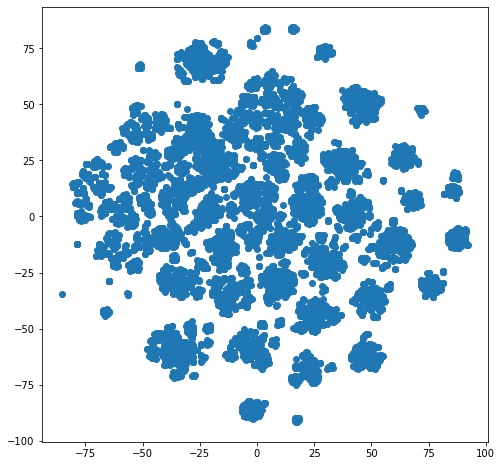

In [75]:
plt.figure(figsize=(8, 8))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1])
plt.show()

Będziemy dobierać optymalną liczbę klastrów przy użyciu trzech metod: 
* metoda Łokcia
* metoda Silhouette
* przy użyciu mertyki Dunn Index 

### Metoda łokcia dla k-means

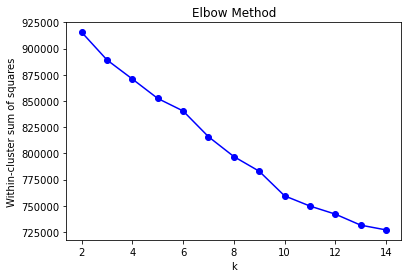

In [17]:
from sklearn.cluster import KMeans
elbow_scores = []
k = range(2,15)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_shoppers_o)
    wcss = kmeans.inertia_
    elbow_scores.append(wcss)
plt.plot(k,elbow_scores,'bo-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

Używając metody łockia ciężko jest nam wywnioskować, najbardziej optymalna liczbe klastrów. Zobaczmy jak klasteryzacja wygląda dla k=5.

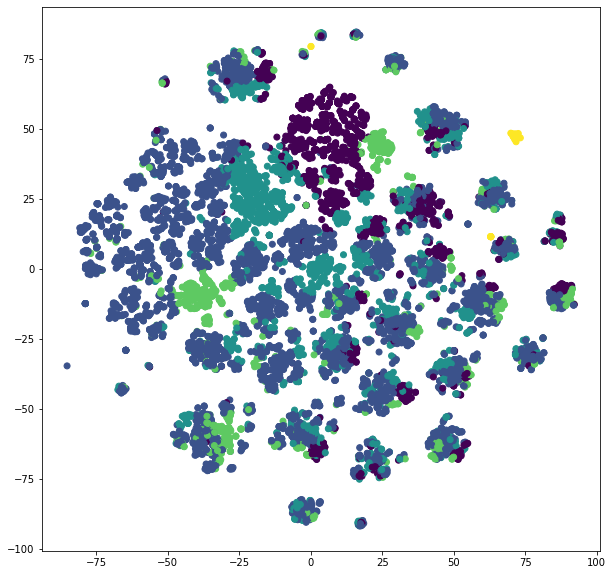

In [68]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(df_shoppers_o)
preds_kmeans5 = kmeans5.predict(df_shoppers_o)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kmeans5)
plt.show()

### Metoda Silhouette dla k-means

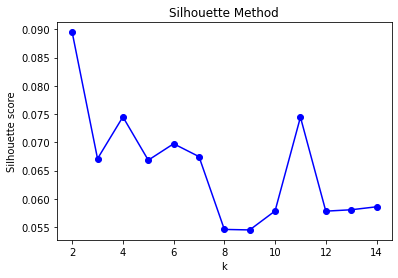

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
k = range(2, 15)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_shoppers_o)
    labels = kmeans.predict(df_shoppers_o)
    score = silhouette_score(df_shoppers_o,labels, random_state=42)
    ss.append(score)
plt.plot(k,ss,'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

Najwyższa wartość Silhouette Score jest dla k = 2 i k = 4

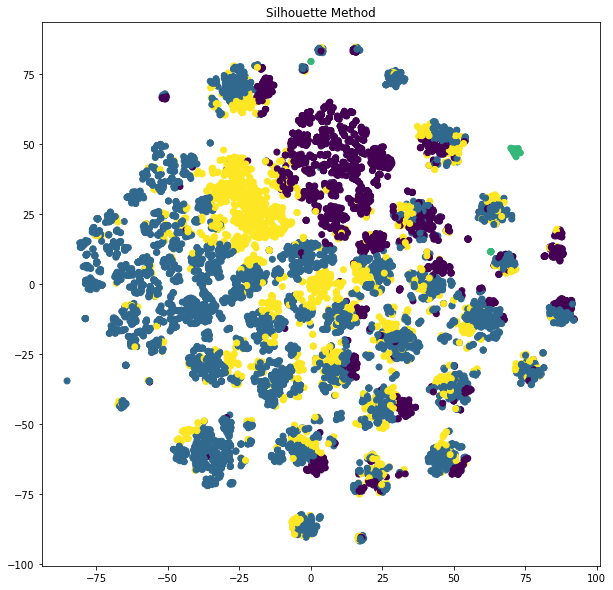

In [69]:
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(df_shoppers_o)
preds_kmeans4 = kmeans4.predict(df_shoppers_o)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kmeans4)
plt.title('Silhouette Method')
plt.show()

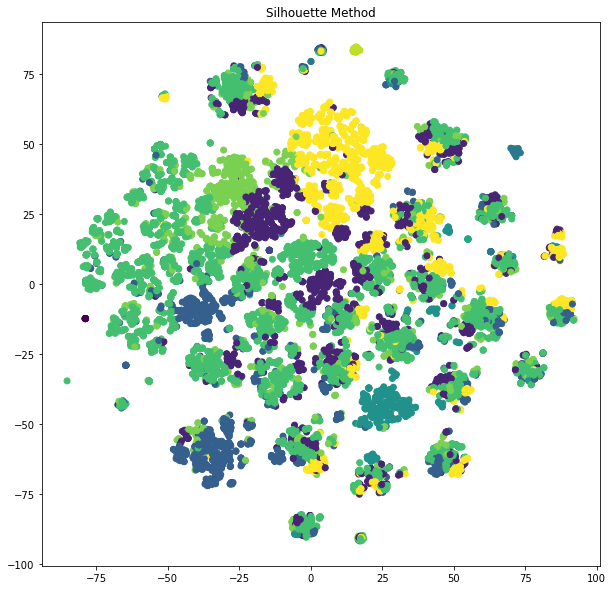

In [24]:
kmeans11 = KMeans(n_clusters=11, random_state=42)
kmeans11.fit(df_shoppers_o)
preds_kmeans11 = kmeans11.predict(df_shoppers_o)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kmeans11)
plt.title('Silhouette Method')
plt.show()

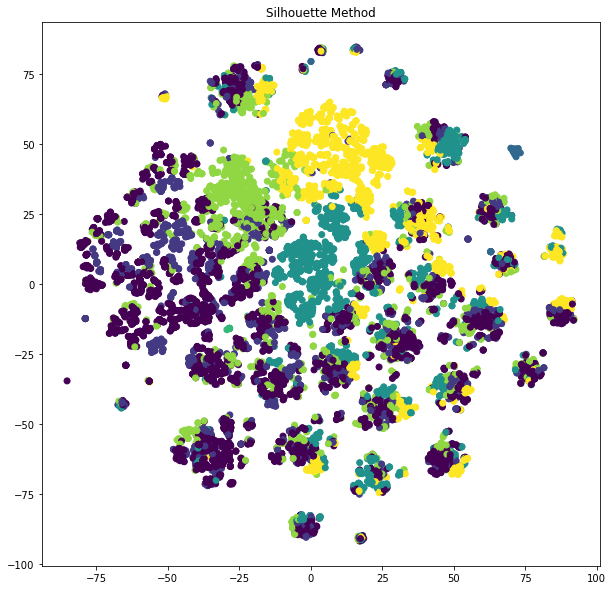

In [25]:
kmeans7 = KMeans(n_clusters=7, random_state=42)
kmeans7.fit(df_shoppers_o)
preds_kmeans7 = kmeans7.predict(df_shoppers_o)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kmeans7)
plt.title('Silhouette Method')
plt.show()

### Indeks Dunna dla k-means

In [36]:
from sklearn.metrics.pairwise import euclidean_distances
def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di

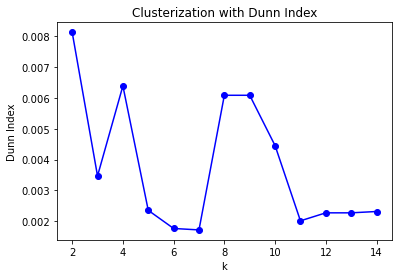

In [37]:
scores = []
k = range(2,15)
for i in k:
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_shoppers_o)
    labels = kmeans.predict(df_shoppers_o)
    scores.append(dunn_fast(df_shoppers_o,labels))
plt.plot(k,scores,'bo-')
plt.xlabel('k')
plt.ylabel('Dunn Index')
plt.title('Clusterization with Dunn Index')
plt.show()

W powyższym przykładzie indeks Dunna ma najlepszą wartość dla k = 2 i k = 4

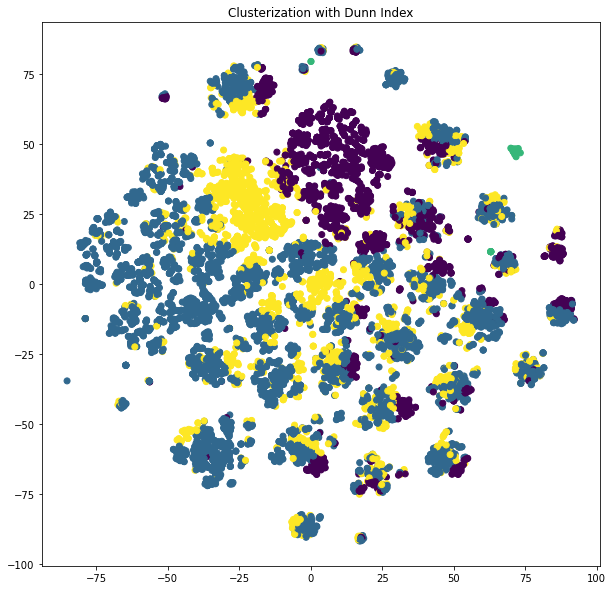

In [28]:
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(df_shoppers_o)
preds_kmeans4 = kmeans4.predict(df_shoppers_o)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kmeans4)
plt.title('Clusterization with Dunn Index')
plt.show()

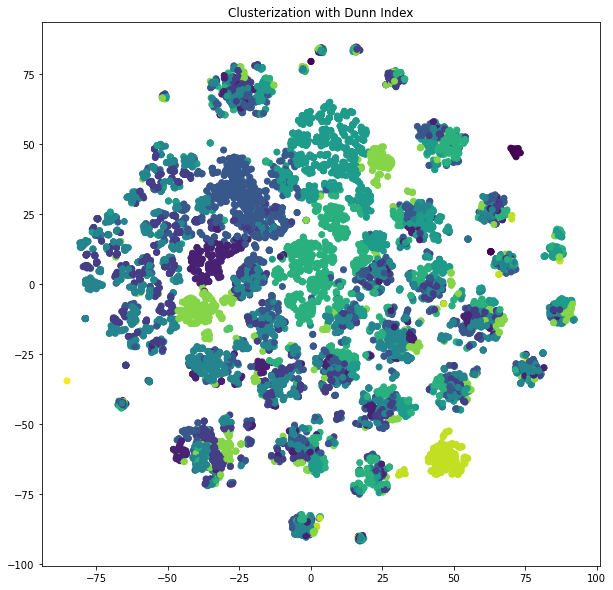

In [31]:
kmeans11 = KMeans(n_clusters=12, random_state=42)
kmeans11.fit(df_shoppers_o)
preds_kmeans11 = kmeans11.predict(df_shoppers_o)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kmeans11)
plt.title('Clusterization with Dunn Index')
plt.show()

## Metoda k-prototype
### Metoda łokcia dla k-prototype

In [84]:
df_shoppers_num = StandardScaler().fit_transform(df_shoppers[numeric])
df_shoppers_num = pd.DataFrame(df_shoppers_num,columns=numeric)
df_shoppers_s = pd.merge(df_shoppers_num,df_shoppers[categorical],left_index=True,right_index=True)

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

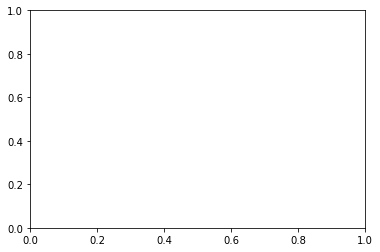

In [30]:
df_shoppers_num = StandardScaler().fit_transform(df_shoppers[numeric])
df_shoppers_num = pd.DataFrame(df_shoppers_num,columns=numeric)
df_shoppers_s = pd.merge(df_shoppers_num,df_shoppers[categorical],left_index=True,right_index=True)
from kmodes.kprototypes import KPrototypes
categorical_numbers = [df_shoppers_s.columns.get_loc(col) for col in categorical]
arr_shoppers = df_shoppers_s.to_numpy()
scores= []
k = range(2,10)
for i in k:
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = i, init = 'Huang', random_state = 0)
        kprototype.fit_predict(arr_shoppers, categorical = categorical_numbers)
        scores.append(kprototype.cost_)
    except:
        break
plt.plot(k,scores,'bo-')
plt.xlabel('k')
plt.title('Elbow Method')
plt.ylabel('Cost')
plt.show()

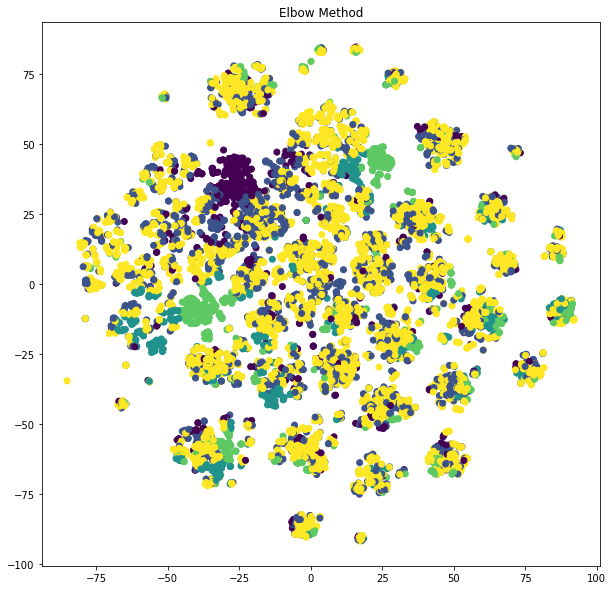

In [61]:
from kmodes.kprototypes import KPrototypes
categorical_numbers = [df_shoppers_s.columns.get_loc(col) for col in categorical]
arr_shoppers = df_shoppers_s.to_numpy()
kprototype5 = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
preds_kprot5 = kprototype5.fit_predict(arr_shoppers, categorical = categorical_numbers)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kprot5)
plt.title('Elbow Method')
plt.show()

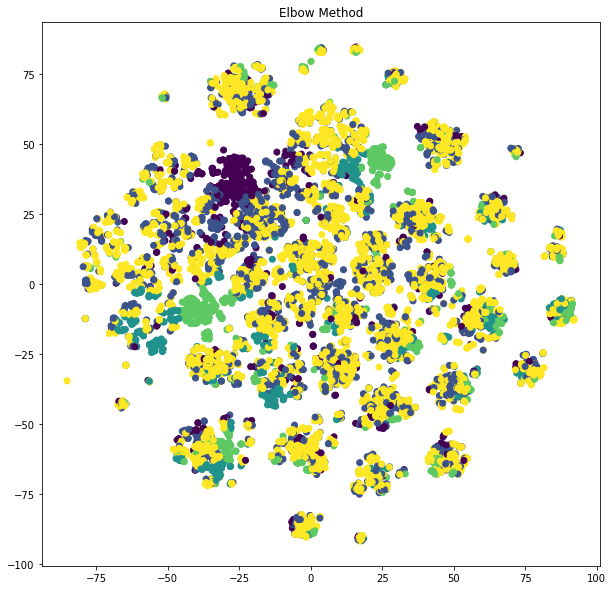

In [62]:
from kmodes.kprototypes import KPrototypes
categorical_numbers = [df_shoppers_s.columns.get_loc(col) for col in categorical]
arr_shoppers = df_shoppers_s.to_numpy()
kprototype4 = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
preds_kprot4 = kprototype5.fit_predict(arr_shoppers, categorical = categorical_numbers)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kprot5)
plt.title('Elbow Method')
plt.show()

### Metoda Silhouette dla k-prototype

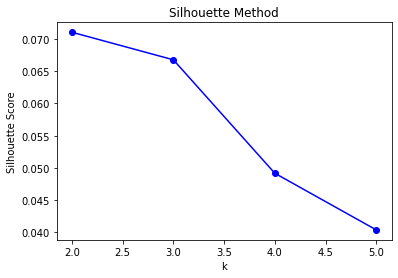

In [70]:
from sklearn.metrics import silhouette_score
categorical_numbers = [df_shoppers_s.columns.get_loc(col) for col in categorical]
arr_shoppers = df_shoppers_s.to_numpy()
scores= []
k = range(2,6)
for i in k:
        kprototype = KPrototypes(n_clusters = i, random_state = 0)
        labels = kprototype.fit_predict(arr_shoppers, categorical = categorical_numbers)
        score = silhouette_score(df_shoppers_o,labels, random_state=42)
        scores.append(score)
plt.plot(k,scores,'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

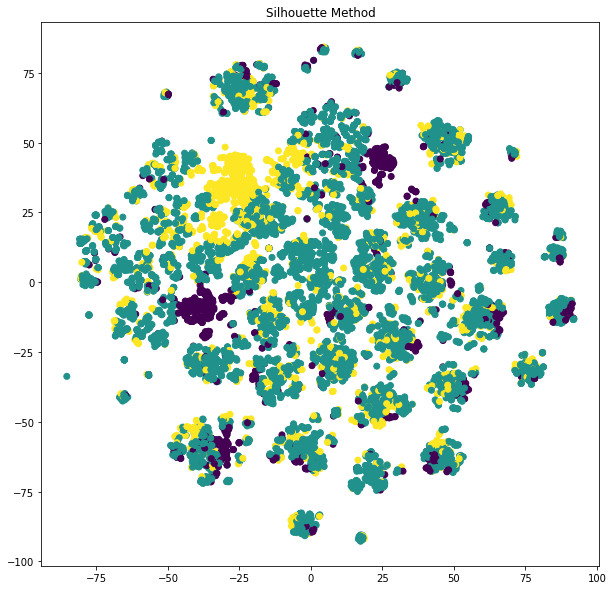

In [102]:
kprototype3 = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
preds_kprot3 = kprototype3.fit_predict(arr_shoppers, categorical = categorical_numbers)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_kprot3)
plt.title('Silhouette Method')
plt.show()

### Index Dunna dla k-prototypes

In [ ]:
from kmodes.kprototypes import KPrototypes
arr_shoppers = df_shoppers.to_numpy()
categorical_numbers = [df_shoppers.columns.get_loc(col) for col in categorical]
scores = []
k = range(2,6)
for i in k:
    kprototype = KPrototypes(n_jobs = -1, n_clusters = i, init = 'Huang', random_state = 0)
    labels = kprototype.fit_predict(arr_shoppers, categorical = categorical_numbers)
    scores.append(dunn_fast(df_shoppers_o.to_numpy(),labels))
plt.plot(k,scores,'bo-')
plt.xlabel('k')
plt.ylabel('Dunn Index')
plt.title('Clusterization with Dunn Index')
plt.show()

In [ ]:
kprototype5 = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
predsk5 = kprototype5.fit_predict(arr_shoppers, categorical = categorical_numbers)
plt.figure(figsize=(10,10))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=predsk5)
plt.title('Clusterization with Dunn Index')
plt.show()

## Klasteryzacja z użyciem Gaussian Mixture Models (GMM) po one-hot encoding
### Akaike Information Criterion (AIC) dla GMM

# wczesniej sillhouete licze

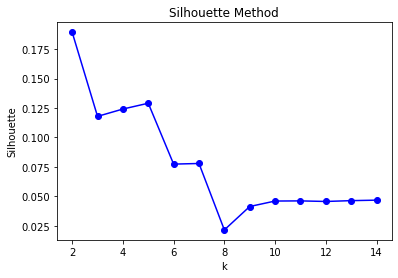

In [38]:

from sklearn.mixture import GaussianMixture
ss_scores = []
k = range(2,15)
for i in k:
    gm = GaussianMixture(n_components=i, random_state=0,covariance_type='full')
    gm.fit(df_shoppers_o)
    labels = gm.predict(df_shoppers_o)
    ss_scores.append(silhouette_score(df_shoppers_o, labels, random_state = 42))
plt.plot(k,ss_scores,'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette Method')
plt.show()


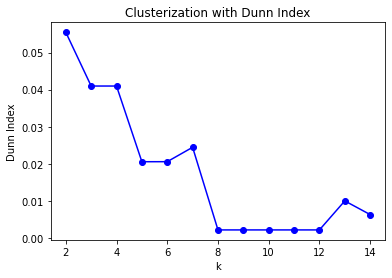

In [40]:
scores = []
k = range(2,15)
for i in k:
    gm = GaussianMixture(n_components=i, random_state=0,covariance_type='full')
    gm.fit(df_shoppers_o)
    labels = gm.predict(df_shoppers_o)
    scores.append(dunn_fast(df_shoppers_o,labels))
plt.plot(k,scores,'bo-')
plt.xlabel('k')
plt.ylabel('Dunn Index')
plt.title('Clusterization with Dunn Index')
plt.show()

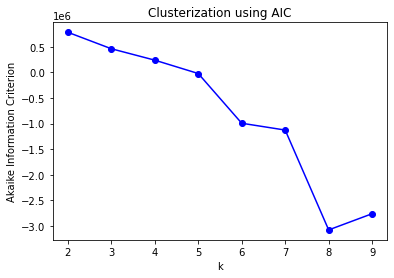

In [33]:
from sklearn.mixture import GaussianMixture
aic_scores = []
k = range(2,10)
for i in k:
    gm = GaussianMixture(n_components=i, random_state=0,covariance_type='full')
    gm.fit(df_shoppers_o)
    aic_scores.append(gm.aic(df_shoppers_o))
plt.plot(k,aic_scores,'bo-')
plt.xlabel('k')
plt.ylabel('Akaike Information Criterion')
plt.title('Clusterization using AIC')
plt.show()

Zależy nam na zminimalizowaniu wartości kryterium informacyjnego Akaikego, więc optymalną liczba klastrów będzie k=5.

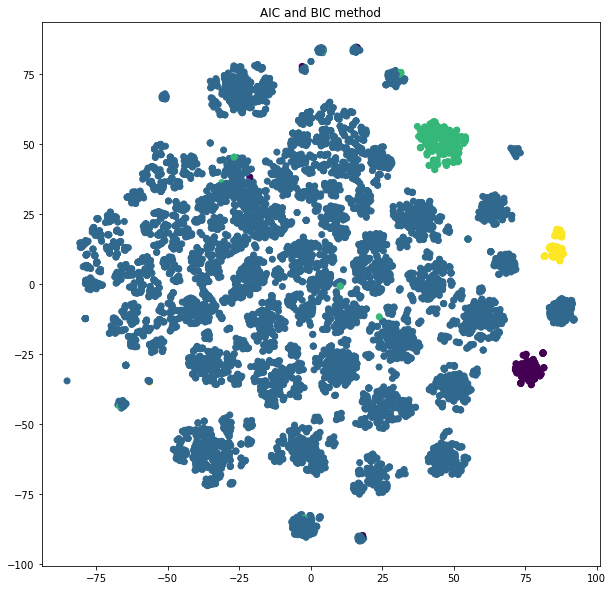

In [93]:
gm5 = GaussianMixture(n_components=4, random_state=0)
gm5.fit(df_shoppers_o)
preds_gmm5 = gm5.predict(df_shoppers_o)


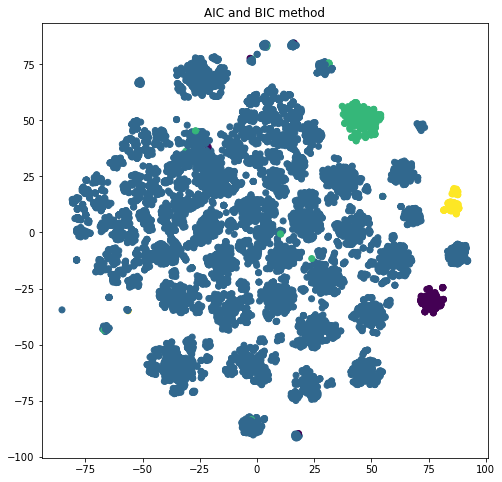

In [94]:
plt.figure(figsize=(8,8))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_gmm5)
plt.title("AIC and BIC method")
plt.show()

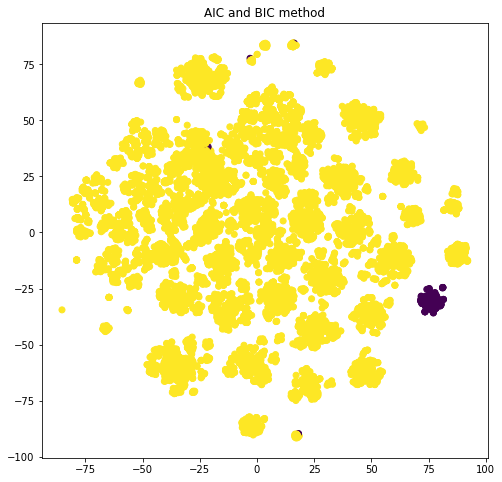

In [78]:
from sklearn.mixture import GaussianMixture

gm4 = GaussianMixture(n_components=2, random_state=0)
gm4.fit(df_shoppers_o)
preds_gmm4 = gm4.predict(df_shoppers_o)
plt.figure(figsize=(8,8))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_gmm4)
plt.title("AIC and BIC method")
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gm4 = GaussianMixture(n_components=4, random_state=0)
gm4.fit(df_shoppers_o)
preds_gmm4 = gm4.predict(df_shoppers_o)
plt.figure(figsize=(8,8))
plt.scatter(shoppers_2d[:,0],shoppers_2d[:,1],c=preds_gmm4)
plt.title("AIC and BIC method")
plt.show()

In [89]:
from scipy.spatial import distance

def min_interclust_dist(X, label):
    clusters = set(label)
    global_min_dist = np.inf
    for cluster_i in clusters:
        cluster_i_idx = np.where(label == cluster_i)
        for cluster_j in clusters:
            if cluster_i != cluster_j:
                cluster_j_idx = np.where(label == cluster_j)
                interclust_min_dist = np.min(distance.cdist(X[cluster_i_idx], X[cluster_j_idx]))
                global_min_dist = np.min([global_min_dist, interclust_min_dist])
    return global_min_dist

def _inclust_mean_dists(X, label):
    clusters = set(label)
    inclust_dist_list = []
    for cluster_i in clusters:
        cluster_i_idx = np.where(label == cluster_i)
        inclust_dist = np.mean(distance.pdist(X[cluster_i_idx]))
        inclust_dist_list.append(inclust_dist)
    return inclust_dist_list

def mean_inclust_dist(X, label):
    inclust_dist_list = _inclust_mean_dists(X, label)
    return np.mean(inclust_dist_list)

def std_dev_of_inclust_dist(X, label):
    inclust_dist_list = _inclust_mean_dists(X, label)
    return np.std(inclust_dist_list)

def mean_dist_to_center(X, label):
    clusters = set(label)
    inclust_dist_list = []
    for cluster_i in clusters:
        cluster_i_idx = np.where(label == cluster_i)
        cluster_i_mean = np.mean(X[cluster_i_idx], axis=0, keepdims=True)
        inclust_dist = np.mean(distance.cdist(X[cluster_i_idx], cluster_i_mean))
        inclust_dist_list.append(inclust_dist)
    return np.mean(inclust_dist_list)


In [90]:
X = df_shoppers_o
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(df_shoppers_o)
preds_kmeans2 = kmeans2.predict(df_shoppers_o)
gm2 = GaussianMixture(n_components=2, random_state=0)
gm2.fit(df_shoppers_o)
preds_gmm2 = gm2.predict(df_shoppers_o)
from kmodes.kprototypes import KPrototypes
categorical_numbers = [df_shoppers_s.columns.get_loc(col) for col in categorical]
arr_shoppers = df_shoppers_s.to_numpy()
kprototype2 = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
preds_kprot2 = kprototype2.fit_predict(arr_shoppers, categorical = categorical_numbers)
results5= {
    'Clustering Method': ['k-means','k-prototypes','GMM'],
    'Minimal distance between clusters': [min_interclust_dist(X,preds_kmeans5),min_interclust_dist(X,preds_kprot5),min_interclust_dist(X,preds_gmm5)],
    'Average distance between points in the same class' :  [mean_inclust_dist(X,preds_kmeans5),mean_inclust_dist(X,preds_kprot5),mean_inclust_dist(X,preds_gmm5)], 
    'Standard deviation of distance between points in the same class': [std_dev_of_inclust_dist(X,preds_kmeans5),std_dev_of_inclust_dist(X,preds_kprot5),std_dev_of_inclust_dist(X,preds_gmm5)],
    'Average distance to cluster center': [mean_dist_to_center(X,preds_kmeans5),mean_dist_to_center(X,preds_kprot5),mean_dist_to_center(X,preds_gmm5)]
}


NameError: name 'results2' is not defined

In [91]:
pd.DataFrame(results5)

,Clustering Method,Minimal distance between clusters,Average distance between points in the same class,Standard deviation of distance between points in the same class,Average distance to cluster center
0,k-means,0.370723,10.475770,0.519479,7.229186
1,k-prototypes,0.209582,10.959184,0.653253,7.538688
2,GMM,3.236430,11.399786,2.346797,8.232307


Porównanie różnych metod dla <b>k=5</b>.

In [92]:

X = df_shoppers_o
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(df_shoppers_o)
preds_kmeans5 = kmeans5.predict(df_shoppers_o)
gm5 = GaussianMixture(n_components=5, random_state=0)
gm5.fit(df_shoppers_o)
preds_gmm5 = gm5.predict(df_shoppers_o)
from kmodes.kprototypes import KPrototypes
categorical_numbers = [df_shoppers_s.columns.get_loc(col) for col in categorical]
arr_shoppers = df_shoppers_s.to_numpy()
kprototype5 = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
preds_kprot5 = kprototype5.fit_predict(arr_shoppers, categorical = categorical_numbers)
results5= {
    'Clustering Method': ['k-means','k-prototypes','GMM'],
    'Minimal distance between clusters': [min_interclust_dist(X,preds_kmeans5),min_interclust_dist(X,preds_kprot5),min_interclust_dist(X,preds_gmm5)],
    'Average distance between points in the same class' :  [mean_inclust_dist(X,preds_kmeans5),mean_inclust_dist(X,preds_kprot5),mean_inclust_dist(X,preds_gmm5)], 
    'Standard deviation of distance between points in the same class': [std_dev_of_inclust_dist(X,preds_kmeans5),std_dev_of_inclust_dist(X,preds_kprot5),std_dev_of_inclust_dist(X,preds_gmm5)],
    'Average distance to cluster center': [mean_dist_to_center(X,preds_kmeans5),mean_dist_to_center(X,preds_kprot5),mean_dist_to_center(X,preds_gmm5)]
}
pd.DataFrame(results5)

,Clustering Method,Minimal distance between clusters,Average distance between points in the same class,Standard deviation of distance between points in the same class,Average distance to cluster center
0,k-means,0.370723,10.475770,0.519479,7.229186
1,k-prototypes,0.209582,10.959184,0.653253,7.538688
2,GMM,3.236430,11.399786,2.346797,8.232307


## k = 4

In [ ]:

X = df_shoppers_o
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(df_shoppers_o)
preds_kmeans4 = kmeans4.predict(df_shoppers_o)
gm4 = GaussianMixture(n_components=4, random_state=0)
gm4.fit(df_shoppers_o)
preds_gmm4 = gm4.predict(df_shoppers_o)
from kmodes.kprototypes import KPrototypes
categorical_numbers = [df_shoppers_s.columns.get_loc(col) for col in categorical]
arr_shoppers = df_shoppers_s.to_numpy()
kprototype4 = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
preds_kprot4 = kprototype4.fit_predict(arr_shoppers, categorical = categorical_numbers)

In [47]:

results4= {
    'Clustering Method': ['k-means','k-prototypes','GMM'],
    'Minimal distance between clusters': [min_interclust_dist(X,preds_kmeans4),min_interclust_dist(X,preds_kprot4),min_interclust_dist(X,preds_gmm4)],
    'Average distance between points in the same class' :  [mean_inclust_dist(X,preds_kmeans4),mean_inclust_dist(X,preds_kprot4),mean_inclust_dist(X,preds_gmm4)], 
    'Standard deviation of distance between points in the same class': [std_dev_of_inclust_dist(X,preds_kmeans4),std_dev_of_inclust_dist(X,preds_kprot4),std_dev_of_inclust_dist(X,preds_gmm4)],
    'Average distance to cluster center': [mean_dist_to_center(X,preds_kmeans4),mean_dist_to_center(X,preds_kprot4),mean_dist_to_center(X,preds_gmm4)]
}
pd.DataFrame(results4)

,Clustering Method,Minimal distance between clusters,Average distance between points in the same class,Standard deviation of distance between points in the same class,Average distance to cluster center
0,k-means,1.004133,10.673070,0.684744,7.376642
1,k-prototypes,0.461519,10.806087,0.533923,7.426171
2,GMM,6.449191,10.295296,0.644018,7.127691


## k = 7

In [49]:
kprototype7 = KPrototypes(n_clusters = 7, init = 'Huang', random_state = 0)
preds_kprot7 = kprototype7.fit_predict(arr_shoppers, categorical = categorical_numbers)
gm7 = GaussianMixture(n_components=7, random_state=0)
gm7.fit(df_shoppers_o)
preds_gmm7 = gm7.predict(df_shoppers_o)

In [50]:

results7= {
    'Clustering Method': ['k-means','k-prototypes','GMM'],
    'Minimal distance between clusters': [min_interclust_dist(X,preds_kmeans7),min_interclust_dist(X,preds_kprot7),min_interclust_dist(X,preds_gmm7)],
    'Average distance between points in the same class' :  [mean_inclust_dist(X,preds_kmeans7),mean_inclust_dist(X,preds_kprot7),mean_inclust_dist(X,preds_gmm7)], 
    'Standard deviation of distance between points in the same class': [std_dev_of_inclust_dist(X,preds_kmeans7),std_dev_of_inclust_dist(X,preds_kprot7),std_dev_of_inclust_dist(X,preds_gmm7)],
    'Average distance to cluster center': [mean_dist_to_center(X,preds_kmeans7),mean_dist_to_center(X,preds_kprot7),mean_dist_to_center(X,preds_gmm7)]
}
pd.DataFrame(results7)

C:\Users\Dokumenty\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Dokumenty\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Clustering Method,Minimal distance between clusters,Average distance between points in the same class,Standard deviation of distance between points in the same class,Average distance to cluster center
0,k-means,0.271114,10.623353,0.602067,7.304683
1,k-prototypes,0.209582,10.868546,0.447600,7.477991
2,GMM,3.236430,NaN,NaN,6.869610


WNIOSKI DLA GMM n =  4

(array([  174.,     0.,     0., 11679.,     0.,     0.,   342.,     0.,
            0.,   135.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

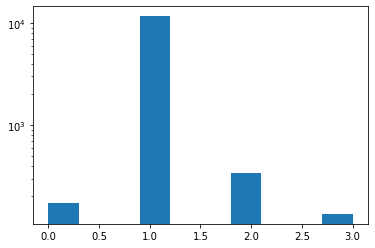

In [17]:
cluster = pd.Series(preds_gmm4, name = 'Cluster')
final_results = df_shoppers
final_results['cluster'] = cluster
plt.hist(final_results['cluster'], log = True)

Widzimy, że jedna kategoria bierze prawie wszytkie obserwacje, a pozostałe grupy są zględnie małe

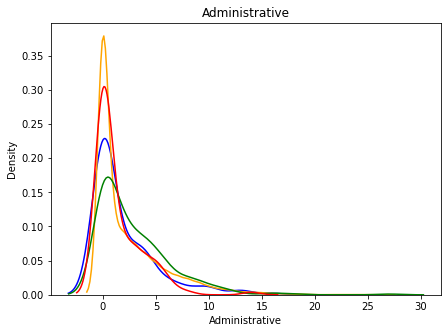

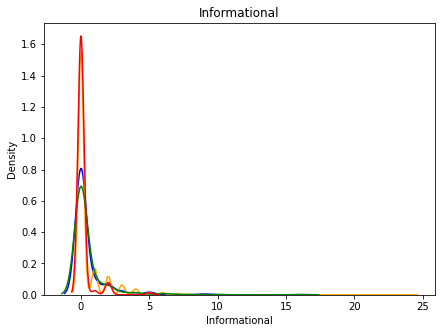

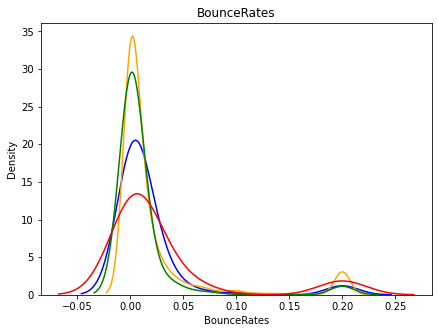

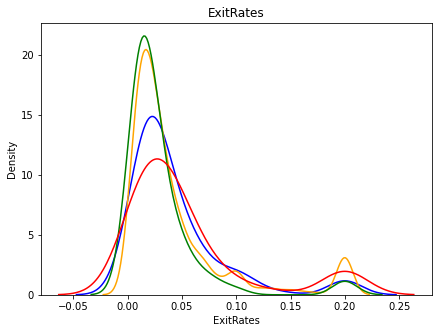

C:\Users\Dokumenty\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


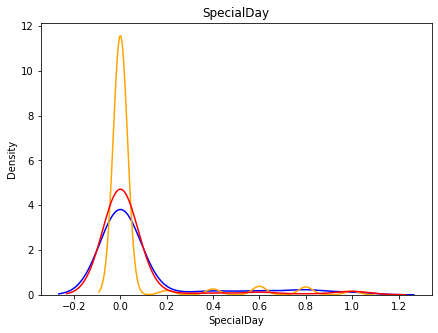

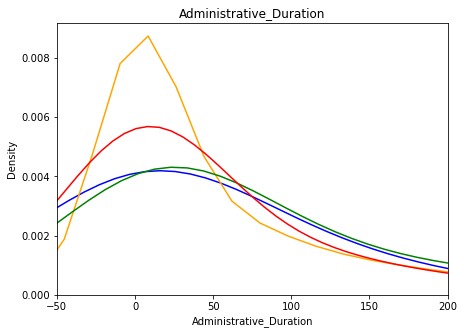

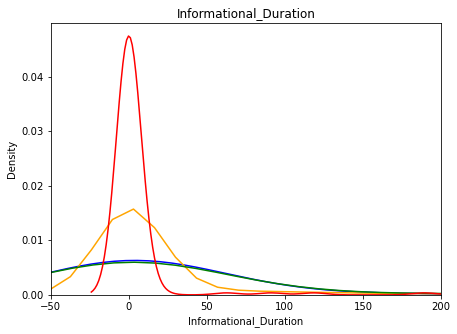

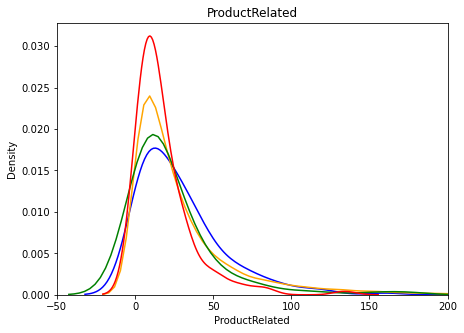

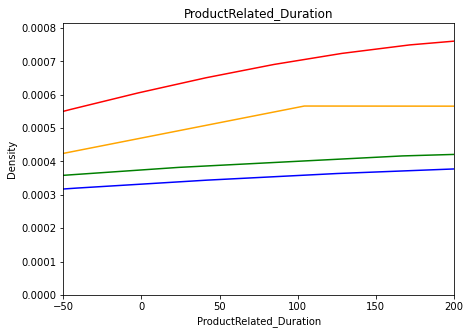

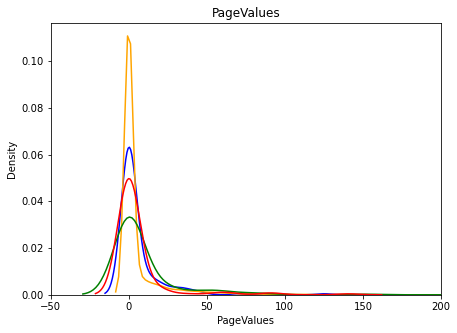

In [70]:
good_numeric = ['Administrative', 'Informational','BounceRates','ExitRates', 'SpecialDay']
for el in good_numeric:
    plt.figure(figsize=(7,5))
    plt.title(el)
    sns.kdeplot(data = final_results[final_results['cluster'] == 0], x = el, color = 'blue', alpha = 0.3)
    sns.kdeplot(data = final_results[final_results['cluster'] == 1], x = el, color = 'orange', alpha = 0.3)
    sns.kdeplot(data = final_results[final_results['cluster'] == 2], x = el, color = 'green', alpha = 0.3)
    sns.kdeplot(data = final_results[final_results['cluster'] == 3], x = el, color = 'red', alpha = 0.3)
    plt.show()

bad_numeric = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues']
for el in bad_numeric:
    plt.figure(figsize=(7,5))
    plt.title(el)
    plt.xlim((-50,200))
    sns.kdeplot(data = final_results[final_results['cluster'] == 0], x = el, color = 'blue', alpha = 0.3)
    sns.kdeplot(data = final_results[final_results['cluster'] == 1], x = el, color = 'orange', alpha = 0.3)
    sns.kdeplot(data = final_results[final_results['cluster'] == 2], x = el, color = 'green', alpha = 0.3)
    sns.kdeplot(data = final_results[final_results['cluster'] == 3], x = el, color = 'red', alpha = 0.3)
    plt.show()


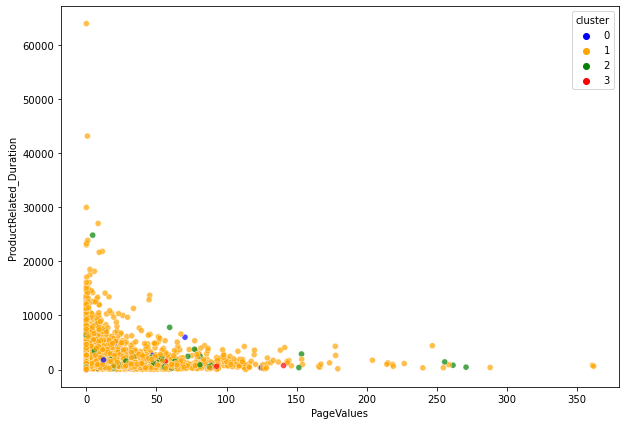

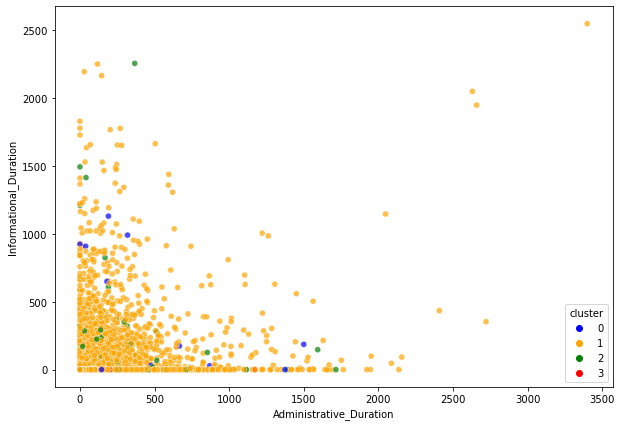

In [64]:

plt.figure(figsize=(10,7))
sns.scatterplot(data = final_results, x = 'PageValues', y = 'ProductRelated_Duration', hue = 'cluster', palette = ['blue', 'orange', 'green', 'red'], alpha = 0.7)
plt.show()
plt.figure(figsize=(10,7))
sns.scatterplot(data = final_results, x = 'Administrative_Duration', y = 'Informational_Duration', hue = 'cluster', palette = ['blue', 'orange', 'green', 'red'], alpha = 0.7)
plt.show()

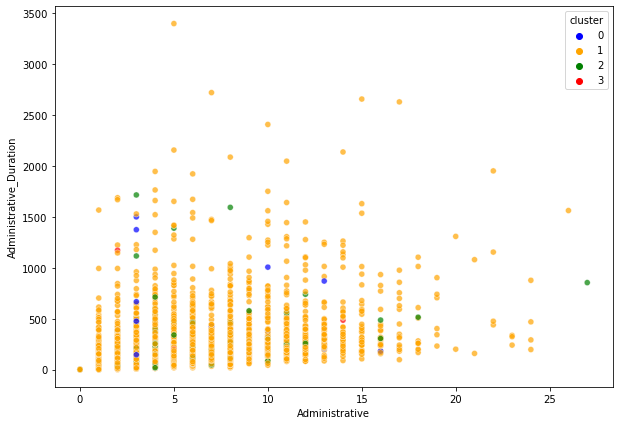

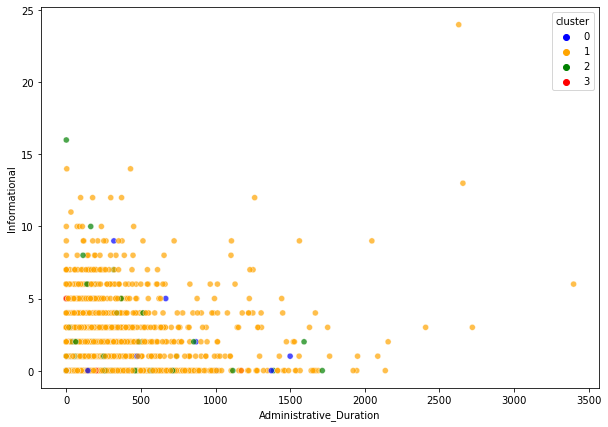

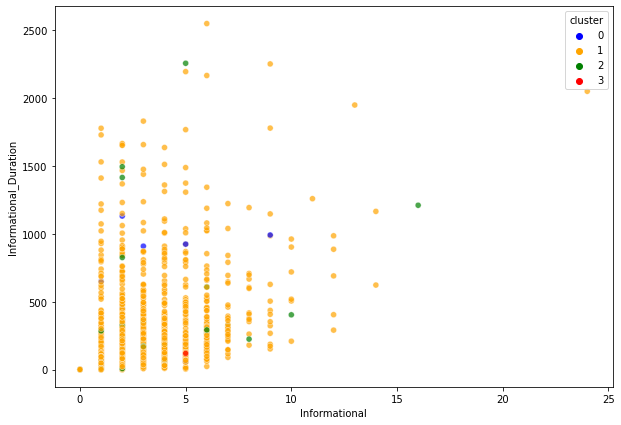

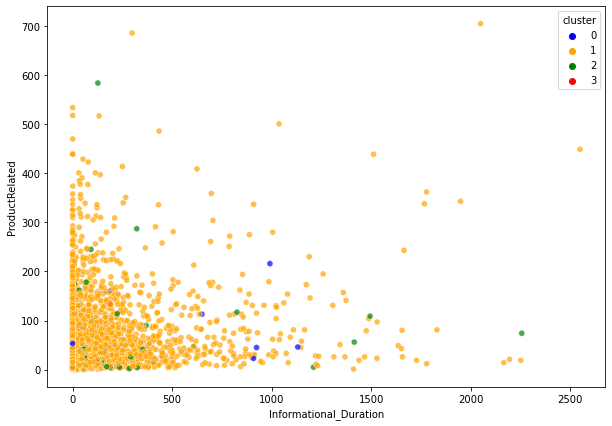

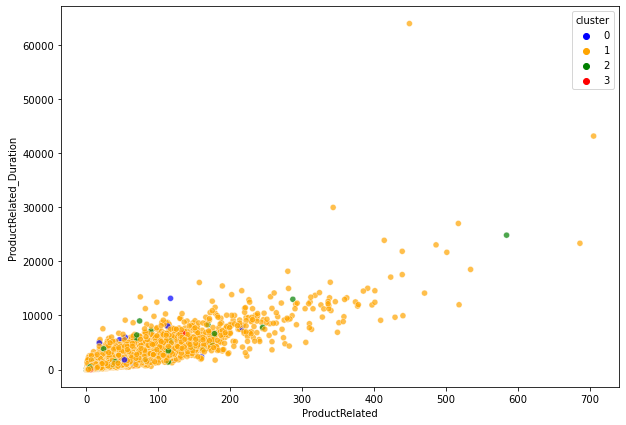

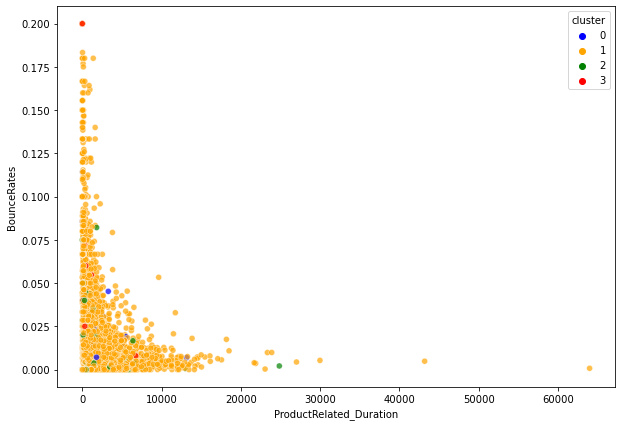

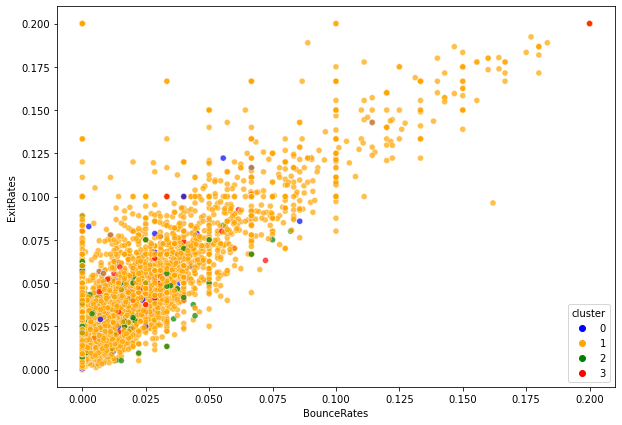

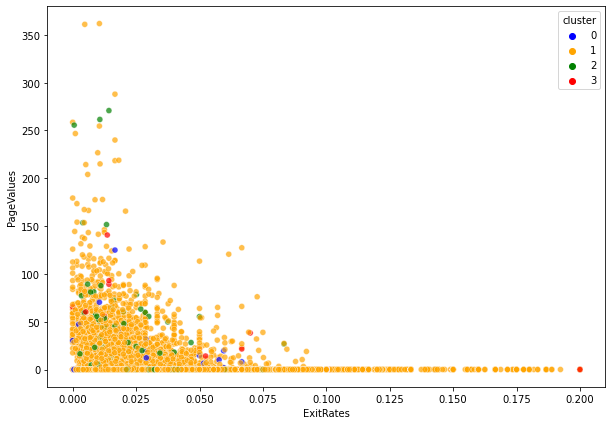

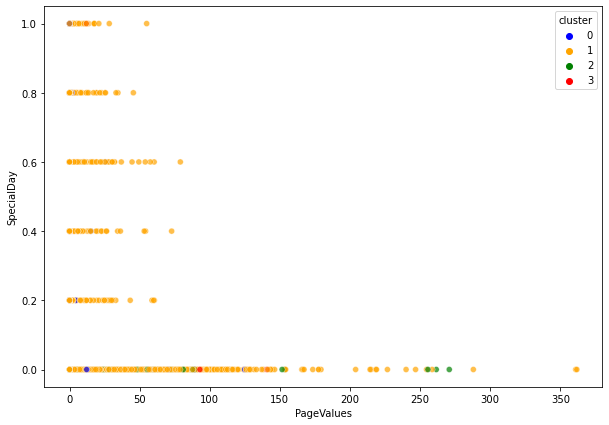

IndexError: list index out of range

<Figure size 720x504 with 0 Axes>

In [65]:

for i in range(len(numeric)):
    plt.figure(figsize=(10,7))
    sns.scatterplot(data = final_results, x = final_results[numeric[i]] , y = final_results[numeric[i+1]], hue = 'cluster', palette = ['blue', 'orange', 'green', 'red'], alpha = 0.7)
    plt.show()

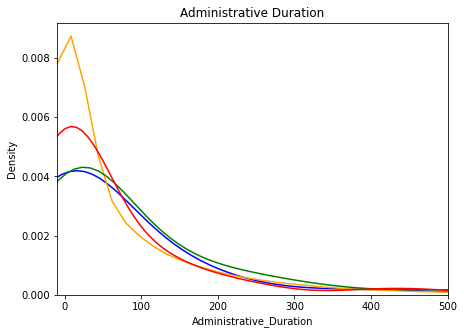

In [44]:
plt.figure(figsize=(7,5))
plt.title('Administrative Duration')
plt.xlim((-10,500))
sns.kdeplot(data = final_results[final_results['cluster'] == 0], x = 'Administrative_Duration', color = 'blue', alpha = 0.3)
sns.kdeplot(data = final_results[final_results['cluster'] == 1], x = 'Administrative_Duration', color = 'orange', alpha = 0.3)
sns.kdeplot(data = final_results[final_results['cluster'] == 2], x = 'Administrative_Duration', color = 'green', alpha = 0.3)
sns.kdeplot(data = final_results[final_results['cluster'] == 3], x = 'Administrative_Duration', color = 'red', alpha = 0.3)
plt.show()

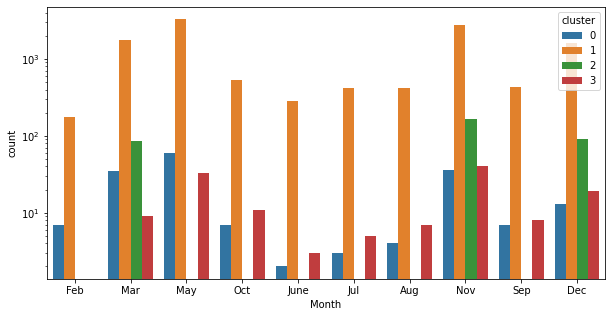

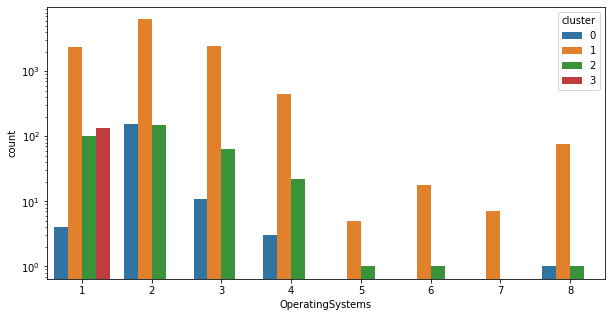

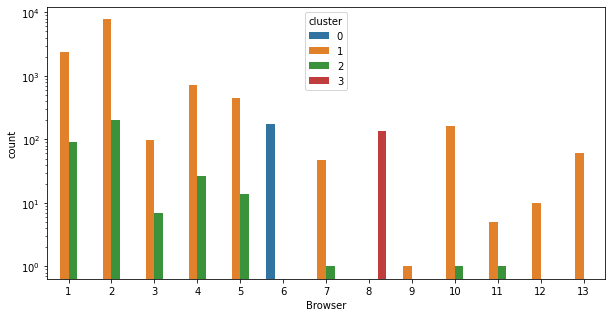

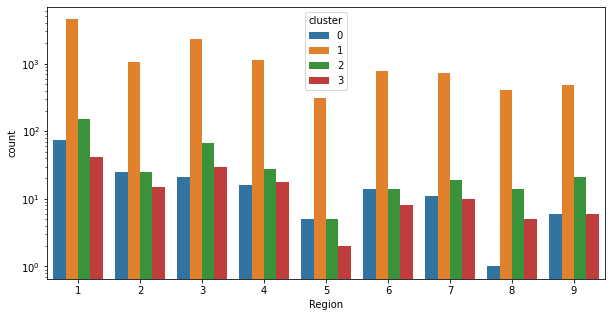

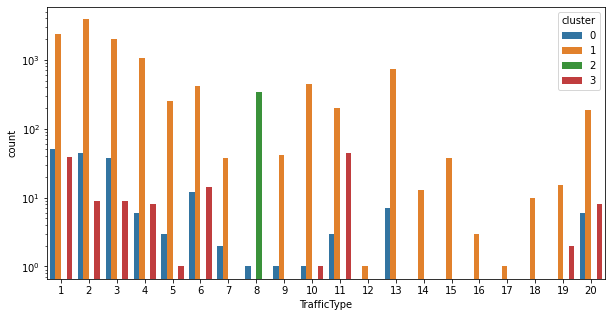

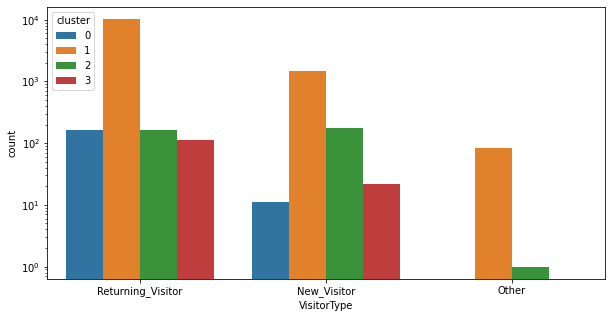

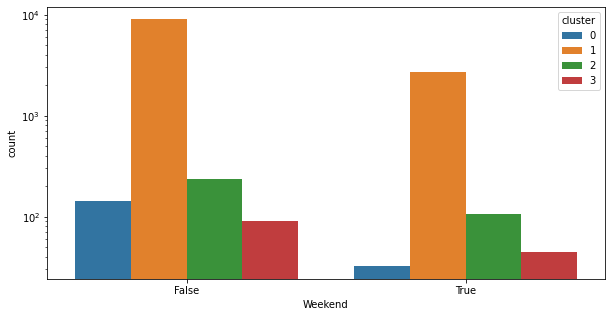

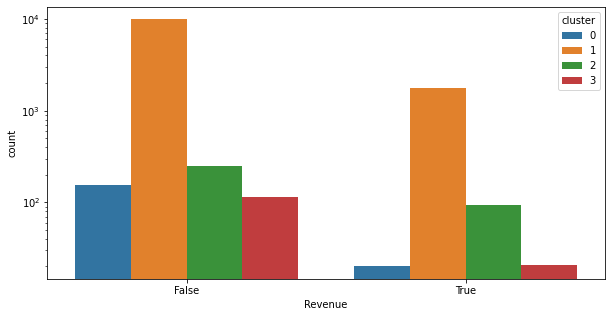

In [27]:
for el in categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(data = final_results, x = el, hue = 'cluster' )
    plt.yscale('log')
    plt.show()

In [35]:
df_shoppers['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

KMEANS 2

(array([2709.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9621.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

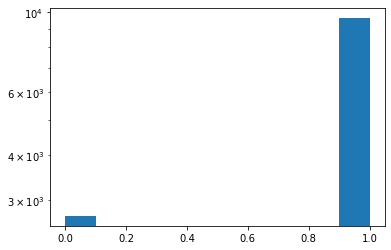

In [95]:
cluster = pd.Series(preds_kmeans2, name = 'Cluster')
final_results = df_shoppers
final_results['cluster'] = cluster
plt.hist(final_results['cluster'], log = True)

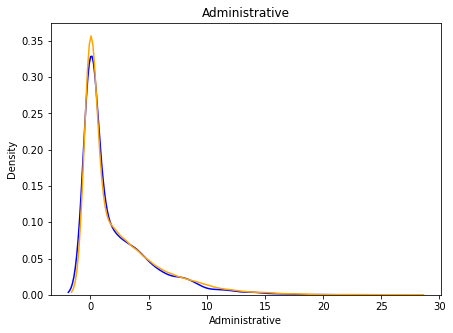

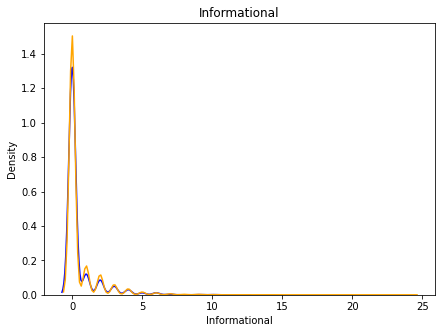

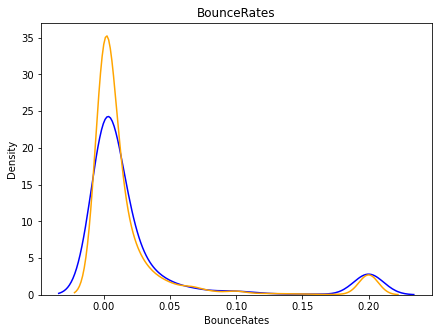

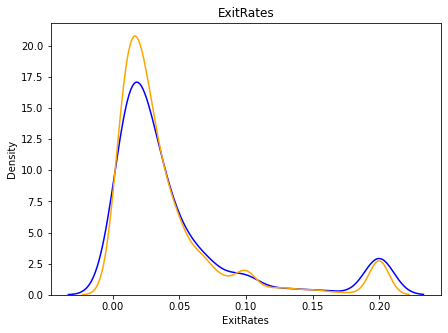

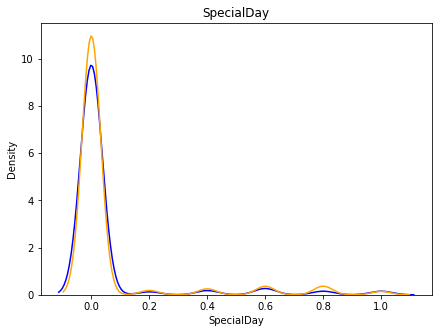

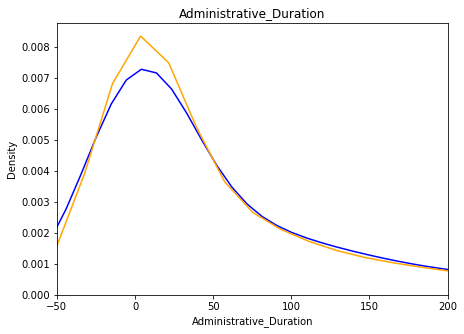

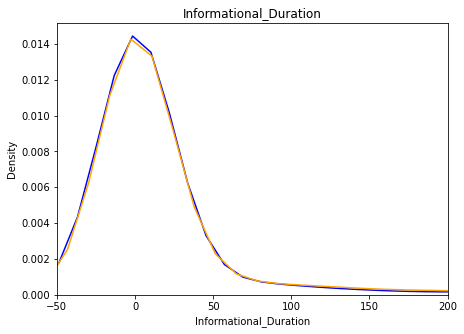

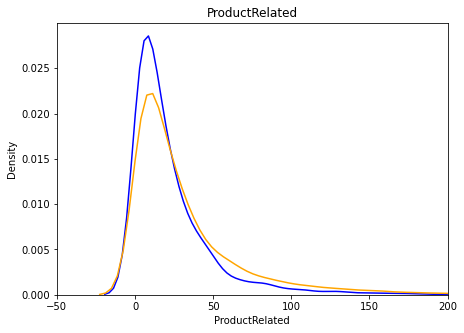

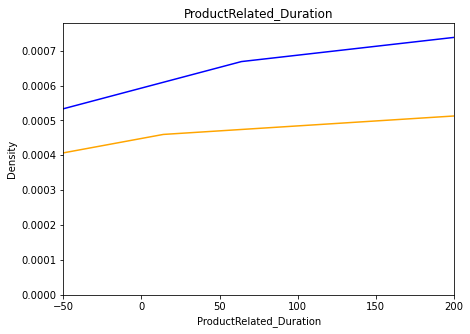

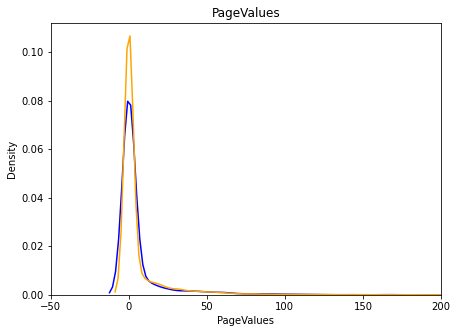

In [96]:
good_numeric = ['Administrative', 'Informational','BounceRates','ExitRates', 'SpecialDay']
for el in good_numeric:
    plt.figure(figsize=(7,5))
    plt.title(el)
    sns.kdeplot(data = final_results[final_results['cluster'] == 0], x = el, color = 'blue', alpha = 0.3)
    sns.kdeplot(data = final_results[final_results['cluster'] == 1], x = el, color = 'orange', alpha = 0.3)
    plt.show()

bad_numeric = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues']
for el in bad_numeric:
    plt.figure(figsize=(7,5))
    plt.title(el)
    plt.xlim((-50,200))
    sns.kdeplot(data = final_results[final_results['cluster'] == 0], x = el, color = 'blue', alpha = 0.3)
    sns.kdeplot(data = final_results[final_results['cluster'] == 1], x = el, color = 'orange', alpha = 0.3)
    plt.show()


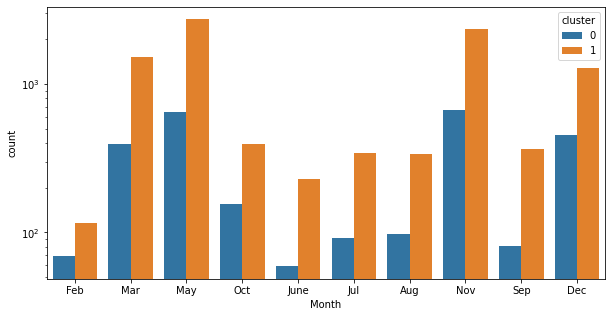

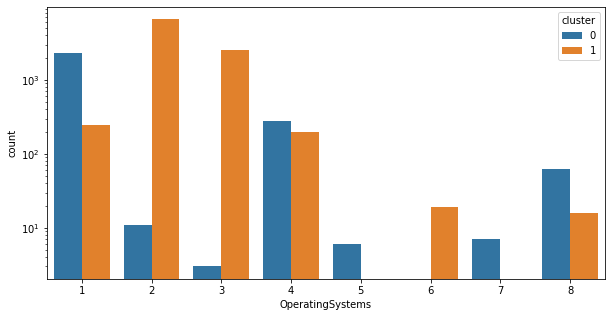

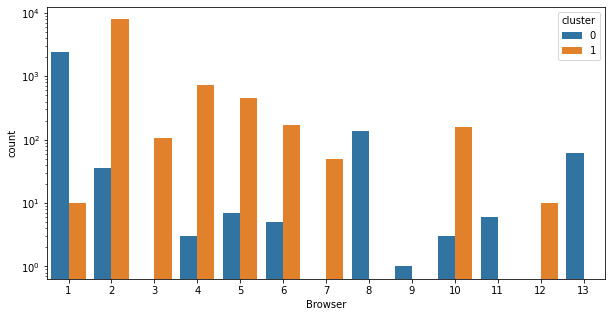

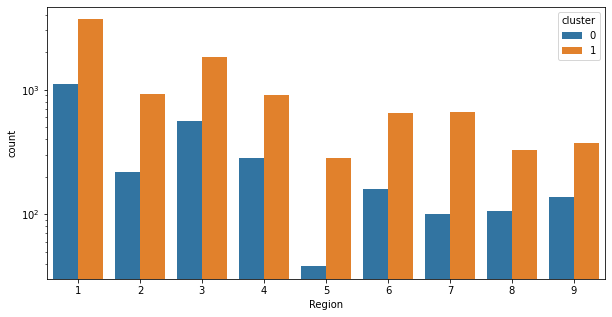

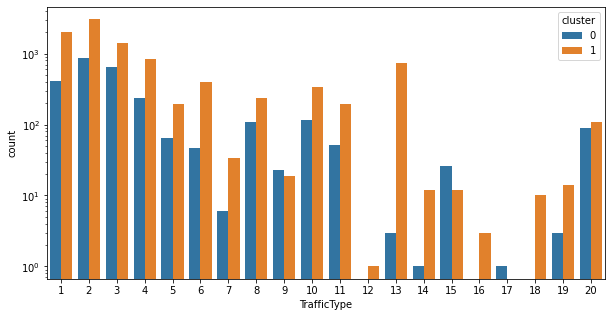

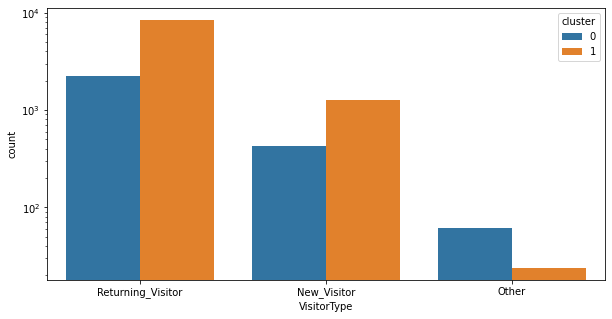

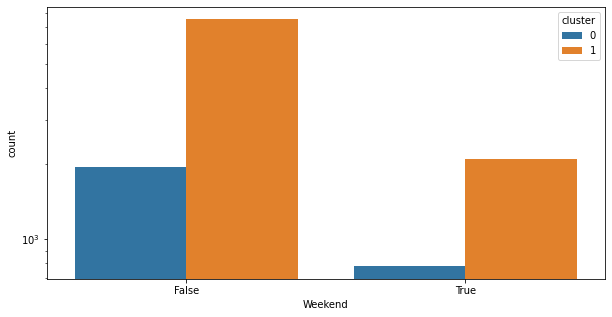

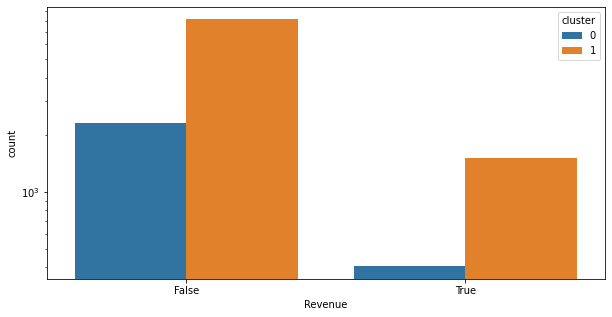

In [97]:
for el in categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(data = final_results, x = el, hue = 'cluster' )
    plt.yscale('log')
    plt.show()